In [14]:
import pandas as pd 
import numpy as np 
import re
# from pandas_profiling import ProfileReport
# !pip install CurrencyConverter
from currency_converter import CurrencyConverter

import seaborn as sns  
import matplotlib.pyplot as plt

# plt.rcParams['figure.dpi'] = 150
# plt.style.use('seaborn-deep')
# pd.set_option('display.max_columns', None)

ModuleNotFoundError: No module named 'currency_converter'

In [16]:
path = ('../EDA-Real-Estate/_data.csv')
df = pd.read_csv(path, index_col= 0)
df.head(5)

,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,...,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615


**В связи с тем, что колонка "Тип" представлена единственным значением - "квартира", удаляем данный столбец как неинформативный для целей исследования**

In [17]:
df.drop(columns=['Тип'],axis=1,inplace=True)

**Аналогично поступаем с колонками "Телефоны","Описание","Площадь комнат","Окна",
"Дополнительно","Ссылка на объявление"**

In [18]:
df.drop(columns=['Телефоны','Описание','Площадь комнат, м2','Окна','Дополнительно','Ссылка на объявление'],axis=1,inplace=True)

**В связи с большим количество отсутствующих данных удалим столбцы "Название ЖК" и "Серия дома"**

***Missing values***

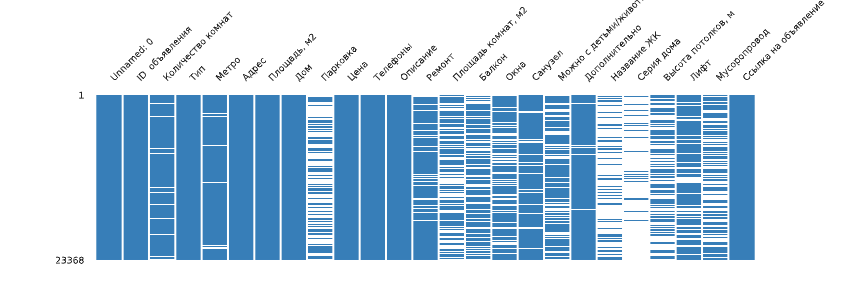

In [19]:
df.drop(columns=['Серия дома','Название ЖК',],axis=1,inplace=True)

**Перечень колонок, оставшихся в dataset**

In [20]:
df.columns

Index(['ID  объявления', 'Количество комнат', 'Метро', 'Адрес', 'Площадь, м2',
       'Дом', 'Парковка', 'Цена', 'Ремонт', 'Балкон', 'Санузел',
       'Можно с детьми/животными', 'Высота потолков, м', 'Лифт',
       'Мусоропровод'],
      dtype='object')

**Преобразуем колонку "Парковка" в бинарный вид, присвоив всем пустным значениям 0, всем остальным - 1**

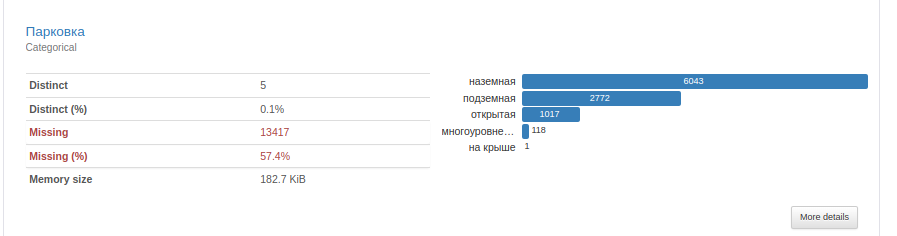

In [21]:
df['Парковка']=df['Парковка'].fillna(0)

In [22]:
df.loc[df['Парковка']!=0,'Парковка']=1

## Обработка "площадь, м2"
решили оставить только общую площадь, а также проверить на аутлаеры. Для того, чтобы проверить выбросы, необходимо посчитать цену за квадратный метр, чтобы была возможность сравнить относительную цену квартиры. 

In [24]:
df['total_area'] = df['Площадь, м2'].apply(lambda s: float(s.split('/')[0]))
#df[(df['total_area'] > 500)][['Количество комнат', 'price_per_month', 'Площадь, м2', 'total_area']]
df['total_area'].describe()


count    23368.000000
mean        62.819425
std         46.699425
min          7.000000
25%         38.000000
50%         48.000000
75%         70.000000
max        811.000000
Name: total_area, dtype: float64

## Обработка "Цены"
Решили сохранить всю информацию из данной колонки, разбить на 5ть новых - цена в мес, залог, комунальные услуги (включены/нет), срок аренды (долгосрочная/краткосрочная) и предоплата (кол-во месяцев)

In [25]:
from forex_python.converter import CurrencyRates, RatesNotAvailableError
cr = CurrencyRates()

usd_rub_rate = 80 ## API не работает, поэтому поставил вручную примерный курс. Если API заработает, то курс подтянется, если нет то будет так
eur_rub_rate = 90

# function to extract price per month
def extract_price(s):
    match = re.search(r'(\d+\.\d+)\s*руб\.', s)
    match_doll = re.search(r'(\d+\.\d+)\s*\$', s)
    match_eur = re.search(r'(\d+\.\d+)\s*\€', s)
    if match:
        return float(match.group(1))
    elif match_doll: 
        usd_price = float(match_doll.group(1))
        try: 
            return cr.convert('USD', 'RUB', usd_price)
        except RatesNotAvailableError: 
            return usd_price * usd_rub_rate
    elif match_eur: 
        eur_price = float(match_eur.group(1))
        try: 
            return cr.convert('EUR', 'RUB', eur_price)
        except RatesNotAvailableError: 
            return eur_price * eur_rub_rate


# function to extract deposit
def extract_deposit(s):
    match = re.search(r'Залог\s*-\s*(\d+.\d+)\s*руб.', s)
    match_doll = re.search(r'Залог\s*-\s*(\d+.\d+)\s*\$', s)
    match_eur = re.search(r'Залог\s*-\s*(\d+.\d+)\s*\€.', s)
    
    if match:
        return float(match.group(1))
    elif match_doll: 
        usd_price = float(match_doll.group(1))
        try: 
            return cr.convert('USD', 'RUB', usd_price)
        except RatesNotAvailableError: 
            return usd_price * usd_rub_rate
    elif match_eur: 
        eur_price = float(match_eur.group(1))
        try: 
            return cr.convert('EUR', 'RUB', eur_price)
        except RatesNotAvailableError: 
            return eur_price * eur_rub_rate
    else: 
        return 0

# function to extract utilities
def extract_utilities(s):
    if 'Коммунальные услуги включены' in s:
        return 1
    else:
        return 0

# function to extract rental term
def extract_term(s):
    if 'Срок аренды - Длительный' in s:
        return 1
    else:
        return 0

# function to extract advance payment
def extract_advance(s):
    match = re.search(r'Предоплата\s+(\d+)\s*мес', s)
    if match:
        return int(match.group(1))
    else:
        return 0

ModuleNotFoundError: No module named 'forex_python'

In [26]:
# apply the functions to create new columns
df['price_per_month'] = df['Цена'].apply(extract_price)
df['deposit'] = df['Цена'].apply(extract_deposit)
df['utilities'] = df['Цена'].apply(extract_utilities)
df['rental_term'] = df['Цена'].apply(extract_term)
df['advance_payment'] = df['Цена'].apply(extract_advance)

NameError: name 'extract_price' is not defined

In [27]:
# проверить, что функции отработали без NaN

df[['price_per_month','deposit','utilities','rental_term','advance_payment', 'total_area']].isna().sum()

KeyError: "['price_per_month', 'deposit', 'utilities', 'rental_term', 'advance_payment'] not in index"

In [28]:
#смотрим на price_per_sqm

df['price_per_sqm'] = df['price_per_month'] / df['total_area']
df['price_per_sqm'].describe()

KeyError: 'price_per_month'

In [260]:
df[(df['price_per_sqm'] < 400)]

,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Ремонт,Балкон,...,"Высота потолков, м",Лифт,Мусоропровод,total_area,price_per_month,deposit,utilities,rental_term,advance_payment,price_per_sqm
984,274969144,"2, Смежная",м. Ладожская (5 мин на машине),"Санкт-Петербург, улица Крюкова, 17",46.0/29.0/7.0,"3/5, Кирпичный",1,"18000.0 руб./ За месяц, Сумма коммунальных пла...",Косметический,Балкон (1),...,NaN,NaN,NaN,46.0,18000.0,18000.0,0,1,1,391.304348
1034,273761320,"3, Изолированная",NaN,"Санкт-Петербург, Ковалевская улица, 18К2",65.1/45.1/7.1,"4/5, Кирпичный",0,"25000.0 руб./ За месяц, Сумма коммунальных пла...",Косметический,Балкон (2),...,2.50,NaN,Нет,65.1,25000.0,30000.0,0,1,1,384.024578
1036,271660240,"3, Изолированная",м. Ладожская (8 мин на машине),"Санкт-Петербург, проспект Энтузиастов, 31к3",100.3/55.9/14.2,"1/17, Панельный",1,"25000.0 руб./ За месяц, Сумма коммунальных пла...",Без ремонта,NaN,...,2.60,"Пасс (1), Груз (1)",Нет,100.3,25000.0,0.0,0,0,1,249.252243
1049,266010464,"3, Изолированная",м. Девяткино (22 мин пешком),"Санкт-Петербург, аллея Евгения Шварца, 13к1, ш...",77.1/46.0/12.1,"21/24, Панельный",0,"30000.0 руб./ За месяц, Сумма коммунальных пла...",Евроремонт,Лоджия (1),...,2.85,"Пасс (2), Груз (1)",NaN,77.1,30000.0,30000.0,0,1,1,389.105058
2522,274633188,3,м. Мякинино (15 мин пешком),"Москва, Неманский проезд, 1к1",775.0/10.0,5/17,0,"60000.0 руб./ За месяц, Залог - 60000 руб., Ко...",Косметический,Балкон (1),...,2.64,Пасс (2),Да,775.0,60000.0,60000.0,1,1,1,77.419355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22704,272334454,2,NaN,"Санкт-Петербург, пос. Шушары, улица Валдайская...",61.7/12.0,25/25,0,"24000.0 руб./ За месяц, Сумма коммунальных пла...",Косметический,Балкон (2),...,NaN,NaN,Нет,61.7,24000.0,13000.0,0,1,1,388.978930
22711,271342969,1,NaN,"Санкт-Петербург, пос. Шушары, Московское шоссе...",31.0/14.0/10.0,3/9,0,"10000.0 руб./ За месяц, Сумма коммунальных пла...",Без ремонта,NaN,...,NaN,"Пасс (1), Груз (1)",NaN,31.0,10000.0,0.0,0,1,1,322.580645
22713,271949078,1,NaN,"Санкт-Петербург, пос. Шушары, Ленсоветовский т...",42.0/17.0/13.7,"8/10, Панельный",0,"14000.0 руб./ За месяц, Залог - 1 руб., Срок а...",Без ремонта,Балкон (1),...,NaN,"Пасс (1), Груз (1)",NaN,42.0,14000.0,0.0,0,1,1,333.333333
22723,268161801,1,NaN,"Санкт-Петербург, пос. Шушары, Ленсоветовский т...",41.0/18.0/11.0,"8/10, Панельный",0,"16000.0 руб./ За месяц, Сумма коммунальных пла...",Косметический,Лоджия (1),...,NaN,Пасс (1),NaN,41.0,16000.0,8000.0,0,1,1,390.243902


## Обработка данных в колонке "Количество комнат"

In [29]:
# Заполняем пустоты колонки 'Количество комнат'

df['Количество комнат'] = df['Количество комнат'].fillna('1')

In [30]:
# Разделяем колонку 'Количество комнат' на три: 'Количество комнат1', 'Смежная комната', 'Изолированная комната' и присваиваем 1 к типу комнаты, который указан к объявлении

df['Количество комнат1'] = [int(row.split(', ')[0]) for row in df['Количество комнат']]
df['Смежная комната'] = [1 if (row.split(', ')[-1]) == 'Смежная' or (row.split(', ')[-1]) == 'Оба варианта' else 0 for row in df['Количество комнат']]
df['Изолированная комната'] = [1 if (row.split(', ')[-1]) == 'Изолированная' or (row.split(', ')[-1]) == 'Оба варианта' else 0 for row in df['Количество комнат']]

In [31]:
# Удаляем обработанную колонку 'Количество комнат',так как она нам больше не понадобится

df = df.drop('Количество комнат', axis=1)

## Обработка данных в колонке "Дом"

In [32]:
# Разделяем колонку "Дом" на 9 колонок: 'Этаж квартиры', 'Этажность дома', 'Кирпичный дом', 'Блочный дом', 'Монолитный дом', 'Монолитно-кирпичный дом', 'Панельный дом', 
# 'Сталинский дом', 'старый фонд' и присваиваем нужные значения

df['Этаж квартиры'] = [int(row.split('/')[0]) for row in df['Дом']]
df['Этаж квартиры'] = abs(df['Этаж квартиры'])     # используем модуль, так как есть отрицательные значения этажей

df['Этажность дома'] = [int(row.split('/')[1].split(', ')[0]) for row in df['Дом']]
df['Кирпичный дом'] = [1 if (row.split(', ')[-1]) == 'Кирпичный' else 0 for row in df['Дом']]
df['Блочный дом'] = [1 if (row.split(', ')[-1]) == 'Блочный' else 0 for row in df['Дом']]
df['Монолитный дом'] = [1 if (row.split(', ')[-1]) == 'Монолитный' else 0 for row in df['Дом']]
df['Монолитно-кирпичный дом'] = [1 if (row.split(', ')[-1]) == 'Монолитно-кирпичный' else 0 for row in df['Дом']]
df['Панельный дом'] = [1 if (row.split(', ')[-1]) == 'Панельный' else 0 for row in df['Дом']]
df['Сталинский дом'] = [1 if (row.split(', ')[-1]) == 'Сталинский' else 0 for row in df['Дом']]
df['старый фонд'] = [1 if (row.split(', ')[-1]) == 'старый фонд' else 0 for row in df['Дом']]

In [33]:
# Удаляем обработанную колонку 'Дом',так как она нам больше не понадобится

df = df.drop('Дом', axis=1)

## Обработка данных в колонке "Балкон"

In [34]:
# Заполняем пустоты колонки "Балкон" и разделяем значения (кол-во) на две колонки "Балкон" и "Лоджия"

df['Балкон'] = df['Балкон'].fillna('Балкон (0)')
df['Лоджия'] = [row.split(' ')[-1] if row.split(' ')[-2] == 'Лоджия' else '(0)' for row in df['Балкон']]
df['Балкон1'] = [row.split(' ')[1] if row.split(' ')[0] == 'Балкон' else '(0)' for row in df['Балкон']]

In [35]:
# Удалаяем лишние символы и переводим значения колонок "Балкон" и "Лоджия" из str в int

df['Лоджия'] = [int(row.replace('(', '').replace(')', '')) for row in df['Лоджия']]
df['Балкон1'] = [int(row.replace('(', '').replace(')', '').replace(',', '')) for row in df['Балкон1']]

In [36]:
# Удаляем обработанную колонку 'Балкон',так как она нам больше не понадобится

df = df.drop('Балкон', axis=1)

## Обработка данных в колонке "Можно с детьми/животными"

In [37]:
# Заполняем пустоты колонки 'Можно с детьми/животными'

df['Можно с детьми/животными'] = df['Можно с детьми/животными'].fillna('0')

In [38]:
# Создаём две новые колонки "Можно с детьми" и "Можно с животными" и присваиваем значения, если можно, то 1, если нельзя, то 0

df['Можно с детьми'] = [1 if (row.split(', ')[0]) == 'Можно с детьми' else 0 for row in df['Можно с детьми/животными']]
df['Можно с животными'] = [1 if (row.split(', ')[-1]) == 'Можно с животными' else 0 for row in df['Можно с детьми/животными']]

In [39]:
# Удаляем обработанную колонку 'Можно с детьми/животными',так как она нам больше не понадобится

df = df.drop('Можно с детьми/животными', axis=1)

## Обработка данных в колонке "Мусоропровод"

In [40]:
# Заполняем пустоты колонки "Мусоропровод" и переводим значения в числовой формат (да-1, нет-0)

df['Мусоропровод'] = df['Мусоропровод'].fillna(0).replace(['Да'], 1).replace(['Нет'], 0)

## Обработка данных в колонке "Санузел"

**Nan в колонке "Санузел" заменим на 1. Преобразуем колонку "Санузел" в две колонки: "Тип cанузла"(раздельный 1,совместный 0) и "Количество санузлов".**

In [57]:
df['Санузел']=df['Санузел'].fillna('Совмещенный (1)')

In [58]:
df['Санузел']=df['Санузел'].fillna('Совмещенный (1)')

In [ ]:
df.insert(11, "Тип cанузла", 0) #добавляем новую колонку

In [44]:
df.insert(12, "Количество санузлов", 0) #добавляем новую колонку

In [45]:
values=list(df['Санузел'].str.findall(r'(\d+(?:\.\d+)?)').values) #только цифры с количеством Санузлов

In [46]:
result=[]
for i in range(len(values)):
    values[i]=[int(x) for x in values[i]]
    result.append(sum(values[i]))
df["Количество санузлов"]=[x for x in result] #заполняем Количество санузлов суммой из колонки "Санузлы"

In [47]:
values_types=list(df['Санузел'].values) #все типы Санузлов в dataset

In [48]:
result_types=[]
for i in range(len(values_types)):
    if 'щ' in values_types[i]:
        result_types.append(1)
    else: result_types.append(0)

df['Тип cанузла']=[x for x in result_types] #заполняем Типы санузлов 
             

In [66]:
df=df.drop(columns='Санузел',axis=1) # удаляем колонку Санузел

## Обработка данных в колонке "Лифт"

**Преобразуем колонку "Лифт" в две колонки: "Лифт пасс"(количество) и "Лифт груз" (количество). Для nan в колонке 'Лифт' применим условие: если в доме больше 5 этажей, то должен быть пассажирский и грузовой лифты**

In [52]:
df['Лифт'] = [row if row == row else
              ['Пасс (1), Груз (1)' if df['Этажность дома'].iloc[i]>5 else 'Пасс (0), Груз (0)'][0]
              for i, row in enumerate(df['Лифт'])] # Избавляемся от NaN, если меньше 5 этажей - нет лифта, 
#для остальных - по одному каждого типа

In [53]:
df['Лифт пасс'] = [row.split(' ')[1] if (row.split(' ')[0]) == 'Пасс' else '(0)' for row in df['Лифт']]
df['Лифт груз'] = [row.split(' ')[-1] if (row.split(' ')[-2]) == 'Груз' else '(0)' for row in df['Лифт']]
# Разбиваем колонку с лифтами на две раздельные 

In [54]:
df['Лифт пасс'] = [row.split('(')[1] for row in df['Лифт пасс']]
df['Лифт пасс'] = [int(row.split(')')[0]) for row in df['Лифт пасс']]
df['Лифт груз'] = [row.split('(')[1] for row in df['Лифт груз']]
df['Лифт груз'] = [int(row.split(')')[0]) for row in df['Лифт груз']]
df = df.drop(['Лифт'], axis = 1)

#удаляем скобки и преобразовываем в целые числа, удаляем колонку Лифт

# Обработка данных в колонке "Метро"
### с данной колонкой совершим несколько действий:
- на основании данных об удалённости от метро создадим новую колонку в которых будет два значения 1 (для объектов которые удалены от метро в 15 минутах ходьбы) и 0 (для отсутствующих данных в колонке "Метро", а также для тех объектов которые находятся на расстоянии более 15 минут пешей доступности от метро)
- саму колонку преобразуем в числовые значения от 0 до 10, которые обозначают административный округ г. Москвы, где расположено ближайшая станция метро от объекта (числа от 1 до 10), число 0 значит, что либо данные о метро отсутствовал, либо станция метро не попала в числовые значения выше.

In [ ]:
df = df[df['Адрес'].apply(lambda x: x.split(',')[0])=='Москва']

In [ ]:
df['Близость к метро'] = df['Метро'][df['Метро'].notna()].apply(lambda x: x.split('(')[1].strip(')'))

In [ ]:
df[df['Близость к метро'].isna()] = 0

In [ ]:
def metro(data, features):
    lst = []
    for i in data[features]:
        if i == 0:
            lst.append(0)
        elif i.split()[0] == 'None':
            lst.append(0)
        elif i.split()[-1] == 'пешком' and int(i.split()[0]) <= 15:
            lst.append(1)
        else: lst.append(0)
    data[features] = lst
metro(df, 'Близость к метро')

# Обработка данных колонки "Высота потолков"
### для заполнения пропущенных ячеек колонки, а также ячейки в которых значения  менее 2.5 м или более 4.5 м назначили новые данный равными Модой для данной колонки 

In [ ]:
mode_height = float(df['Высота потолков, м'].mode())
df['Высота потолков, м'].fillna(mode_height, inplace=True)
df['Высота потолков, м'].mask(df['Высота потолков, м'] > 4.5, mode_height, inplace=True)
df['Высота потолков, м'].mask(df['Высота потолков, м'] < 2.5, mode_height, inplace=True)

# Обработка данных колонки "Ремонт"
### в колонке ремонт всего 5 значений, помимо NaN: 
- косметический
- евроремонт
- дизайнерский
- без ремонта.
Создали новые 4 колонки для каждого из данных значений. NaN в колонку без ремонта

In [ ]:
df['Ремонт'].fillna('Без ремонта', inplace=True)
def repair(data, feature):
    for i in data[feature].unique():
        data[feature + ': ' + i] = (data[feature] == i).astype(int)

repair(df, 'Ремонт')

# Словарь с данными названий станций метро в каком АО

In [ ]:
dct = {
    1: ['Авиамоторная', 'Андроновка', 'Белокаменная', 'Бульвар Рокоссовского', 'Измайлово', 'Измайловская', \
            'Локомотив', 'Лухмановская', 'Новогиреево', 'Новокосино', 'Партизанская', \
            'Первомайская', 'Перово', 'Преображенская площадь', 'Семеновская', 'Соколиная Гора', 'Сокольники', \
            'Улица Дмитриевского', 'Черкизовская', 'Шоссе Энтузиастов', \
            'Щелковская', 'Электрозаводская'],
    2: ['Аминьевская', 'Багратионовская', 'Боровское шоссе', 'Давыдково', 'Киевская', \
            'Кропоткинская', 'Крылатское', 'Кунцевская', 'Кутузовская', 'Ломоносовский проспект', 'Минская', \
            'Мичуринский проспект', 'Молодежная', 'Новопеределкино', 'Озёрная', 'Парк Победы', 'Пионерская', \
            'Проспект Вернадского', 'Рабочий Посёлок', 'Раменки', 'Сетунь', 'Славянский бульвар', 'Солнцево', \
            'Студенческая', 'Тропарёво', 'Филевский парк', 'Фили', 'Юго-Западная'],
    3: ['Говорово', 'Коммунарка', 'Ольховая', 'Остафьево', 'Прокшино', 'Рассказовка', 'Румянцево', 'Саларьево', \
           'Филатов Луг', 'Щербинка'],
    4: ['Аэропорт', 'Балтийская', 'Беговая', 'Беломорская', 'Бескудниково', 'Верхние Лихоборы', \
           'Водный стадион', 'Войковская', 'Гражданская', 'Дегунино', 'Динамо', 'Дмитровская', \
           'Зорге', 'Коптево', 'Красный', 'Балтиец', 'Лихоборы', 'Марк', 'Окружная', 'Панфиловская', \
           'Петровский парк', 'Петровско-Разумовская', 'Полежаевская', 'Речной вокзал', 'Савеловская', \
           'Селигерская', 'Сокол', 'Стрешнево', 'Тимирязевская', 'Ховрино', 'Хорошёво', 'Хорошёвская', 'ЦСКА'],
    5: ['Алексеевская', 'Алтуфьево', 'Бабушкинская', 'Бибирево', 'Ботанический сад', 'Бутырская', 'ВДНХ', \
            'Владыкино', 'Выставочный центр', 'Лианозово', 'Марьина Роща', 'Медведково', 'Окружная', \
            'Отрадное', 'Ростокино', 'Савеловская', 'Свиблово', 'Телецентр', 'Улица Академика Королёва', \
            'Улица Милашенкова', 'Улица Сергея Эйзенштейна', 'Фонвизинская'],
    6: ['Волоколамская', 'Митино', 'Мнёвники', 'Народное Ополчение', 'Октябрьское поле', 'Пенягино', \
            'Планерная', 'Пятницкое шоссе', 'Спартак', 'Строгино', 'Сходненская', 'Терехово', 'Трикотажная', \
            'Тушинская', 'Щукинская'],
    7: ['Александровский сад', 'Арбатская', 'Баррикадная', 'Бауманская', 'Беговая', 'Белорусская', \
           'Библиотека имени Ленина', 'Боровицкая', 'Выставочная', 'Деловой центр', 'Добрынинская', \
           'Достоевская', 'Китай-город', 'Комсомольская', 'Краснопресненская', 'Красносельская', \
           'Красные ворота', 'Крестьянская застава', 'Кузнецкий мост', 'Курская', 'Лубянка', 'Лужники', \
           'Марксистская', 'Маяковская', 'Международная', 'Менделеевская', 'Новокузнецкая', 'Новослободская', \
           'Охотный ряд', 'Павелецкая', 'Площадь Ильича', 'Площадь Революции', 'Площадь трёх вокзалов', \
           'Полянка', 'Пролетарская', 'Проспект Мира', 'Пушкинская', 'Рижская', 'Римская', 'Серпуховская', \
           'Смоленская', 'Спортивная', 'Сретенский бульвар', 'Сухаревская', 'Таганская', 'Тверская', 'Театральная', \
           'Тестовская', 'Третьяковская', 'Трубная', 'Тургеневская', 'Улица 1905 года', 'Фрунзенская', \
           'Цветной бульвар', 'Чеховская', 'Чистые пруды', 'Чкаловская', 'Шелепиха', 'Электрозаводская'],
    8: ['Авиамоторная', 'Братиславская', 'Волгоградский проспект', 'Волжская', 'Выхино', 'Депо', 'Дубровка', \
            'Жулебино', 'Калитники', 'Кожуховская', 'Косино', 'Котельники', 'Кузьминки', 'Курьяново', \
            'Лермонтовский проспект', 'Лефортово', 'Люблино', 'Марьино', 'Москва-Товарная', 'Некрасовка', \
            'Нижегородская', 'Новохохловская', 'Окская', 'Перерва', 'Печатники', 'Рязанский проспект', \
            'Стахановская', 'Текстильщики', 'Угрешская', 'Юго-Восточная'],
    9: ['Академическая', 'Беляево', 'Битцевский парк', 'Бульвар адмирала Ушакова', \
            'Бульвар Дмитрия Донского', 'Бунинская Аллея', 'Бутово', 'Воронцовская', 'Зюзино', 'Калужская', \
            'Каховская', 'Коньково', 'Нахимовский Проспект', 'Новаторская', 'Новоясеневская', \
            'Новые Черёмушки', 'Площадь Гагарина', 'Профсоюзная', 'Севастопольская', 'Теплый стан', \
            'Улица Горчакова', 'Улица Скобелевская', 'Улица Старокачаловская', 'Университет', 'Ясенево'],
    10: ['Автозаводская', 'Алма-Атинская', 'Аннино', 'Борисово', 'Варшавская', 'Верхние Котлы', 'Домодедовская', \
            'ЗИЛ', 'Зябликово', 'Кантемировская', 'Каширская', 'Кленовый бульвар', 'Коломенская', \
            'Красногвардейская', 'Красный Строитель', 'Крымская', 'Ленинский проспект', 'Лесопарковая', \
            'Москворечье', 'Нагатинская', 'Нагатинский Затон', 'Нагорная', 'Орехово', 'Покровское', \
            'Пражская', 'Технопарк', 'Тульская', 'Улица академика Янгеля', 'Царицыно', 'Чертановская', \
            'Шаболовская', 'Шипиловская', 'Южная']
}